# Lecture 12 - EEP 118 Spring 2024
Birth weight and then also college analysis that I ask you to do as daily assignment - see the code provided on bcourses and type your commands in the bottom of this notebook yourself


This is the notebook for Lecture 12.
This concludes the lecture material for the midterm.


To run, hit the `i>|Run` button on top middle bar and keep hitting and it will run line by line,

OR

To run a line that starts with In [ ]:  highlight the content and hit CONTROL ENTER at same time

In [1]:
#Lecture12_birthWeight.R
#LECTURE 12, EEP 118


# Load the 'pacman' package
library(pacman) 
#packages to use load them now using the pacman "manager"
p_load(dplyr, haven, readr) 
#Another great feature of p_load(): if you try to load a package that is not installed on your machine, p_load() install the package for you, rather than throwing an error. For instance, let’s install and load one final package named ggplot2. 
p_load(ggplot2)

pacman::p_load(lfe, lmtest, haven, sandwich, tidyverse,psych,car)
# lfe for running fixed effects regression
# lmtest for displaying robust SE in output table
# haven for loading in dta files
# sandwich for producing robust Var-Cov matrix
# tidyverse for manipulating data and producing plots

#change into Lecture 12 directory
#setwd("/Users/sofiavillas-boas/Dropbox/EEP118_Spring2024/Lectures/Lecture12")


#set scientific display off, thank you Roy
options(scipen=999)

Installing package into ‘/srv/r’
(as ‘lib’ is unspecified)


lfe installed



In [2]:
#-------------------------------------------
#1. Read in data and see the top rows to see column names etc
#-------------------------------------------

#read in a Stata dataset
my_data <- read_dta("Lecture12BWGHT.dta")
head(my_data)

faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc,indx
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22.5,21.0,136.7,73,14,14,1,1,1,0,4.290460,4.5625,0,3.113515,0.001444577
17.5,31.0,150.6,125,2,5,4,1,1,0,4.828314,7.8125,0,2.862201,0.002588194
65.0,2.5,109.4,116,10,12,1,1,0,0,4.753590,7.2500,0,4.174387,0.003536221
65.0,33.0,149.1,98,14,12,1,0,0,0,4.584968,6.1250,0,4.174387,0.003691226
42.5,30.0,138.3,127,12,12,1,0,1,0,4.844187,7.9375,0,3.749504,0.005383291
47.5,18.0,120.5,101,12,14,3,0,0,0,4.615120,6.3125,0,3.860730,0.005682748


In [3]:
#summary stats of birth weight and parity cigs faminc fatheduc motheduc 
#one way describes all data:
describe(my_data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
faminc,1,767,31.88461538,18.0280112,27.5000000,30.85121951,14.8260000,0.500000000,65.0000000,64.5000000,0.602962190,-0.61421781,0.650953757
cigtax,2,767,19.64276402,7.8620297,20.0000000,19.76747967,8.8956000,2.000000000,38.0000000,36.0000000,-0.162028176,-0.07670340,0.283881439
cigprice,3,767,130.59648027,10.2946554,132.6999969,130.60178873,9.3403732,103.800003052,152.5000000,48.6999969,-0.156339667,0.01189795,0.371718461
bwght,4,767,119.37548892,19.5227610,120.0000000,119.73333333,17.7912000,23.000000000,176.0000000,153.0000000,-0.356093611,1.16707513,0.704926043
fatheduc,5,767,13.20860495,2.7394762,12.0000000,13.26341463,2.9652000,2.000000000,18.0000000,16.0000000,-0.382054798,1.02448834,0.098916754
motheduc,6,767,13.11342894,2.4662557,12.0000000,13.14634146,1.4826000,4.000000000,18.0000000,14.0000000,-0.071405205,0.18405207,0.089051333
parity,7,767,1.58409387,0.8445231,1.0000000,1.42764228,0.0000000,1.000000000,6.0000000,5.0000000,1.553811164,2.44202450,0.030493961
male,8,767,0.52281617,0.4998051,1.0000000,0.52845528,0.0000000,0.000000000,1.0000000,1.0000000,-0.091181225,-1.99428099,0.018046915
white,9,767,0.84615385,0.3610366,1.0000000,0.93170732,0.0000000,0.000000000,1.0000000,1.0000000,-1.915055116,1.66961801,0.013036278


In [4]:
#to describe only a subset of the variables in the data:
data2<-cbind(my_data$bwght,my_data$parity,my_data$cigs,my_data$faminc,my_data$fatheduc,my_data$motheduc)
##Renaming first four columns columns
colnames(data2) <- c("bwght", "parity", "cigs", "faminc", "fatheduc", "motheduc")

describe(data2)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bwght,1,767,119.375489,19.5227610,120.0,119.7333333,17.7912,23.0,176,153.0,-0.3560936,1.1670751,0.70492604
parity,2,767,1.584094,0.8445231,1.0,1.4276423,0.0000,1.0,6,5.0,1.5538112,2.4420245,0.03049396
cigs,3,767,1.886571,5.4470069,0.0,0.3268293,0.0000,0.0,40,40.0,3.4546798,13.6624463,0.19668002
faminc,4,767,31.884615,18.0280112,27.5,30.8512195,14.8260,0.5,65,64.5,0.6029622,-0.6142178,0.65095376
fatheduc,5,767,13.208605,2.7394762,12.0,13.2634146,2.9652,2.0,18,16.0,-0.3820548,1.0244883,0.09891675
motheduc,6,767,13.113429,2.4662557,12.0,13.1463415,1.4826,4.0,18,14.0,-0.0714052,0.1840521,0.08905133


box plot of birthweight of babies

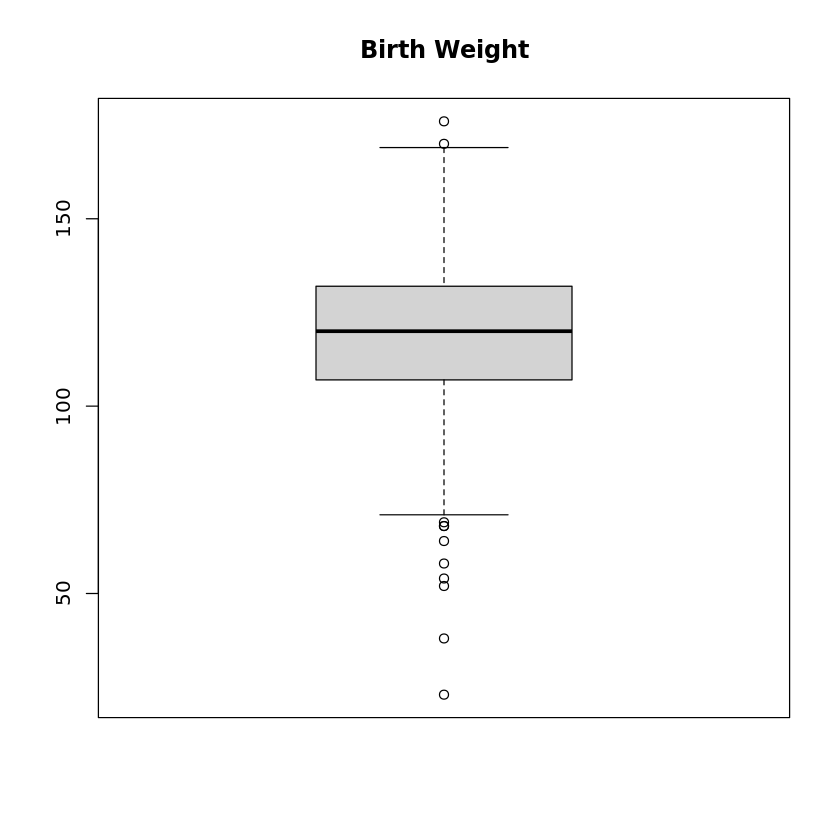

In [5]:
#box plot of birth Weight
boxplot(my_data$bwght, main="Birth Weight" ) 
# box plot for 'bweight above'

TESTING FOR q=2 restrictions on parameters of a linear regression model

In [6]:
#use F test 
#get SSR of the unrestricted model, several things are saved in reg12u
# a list of 12 things actually, see the Golbal envinoment window on the right near reg12u


#regression unrestricted model
reg12u <- lm(bwght~cigs + faminc + motheduc + fatheduc + parity, my_data)
#show output
summary(reg12u)




Call:
lm(formula = bwght ~ cigs + faminc + motheduc + fatheduc + parity, 
    data = my_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-95.701 -11.902   0.471  11.530  60.392 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 114.11003    4.51768  25.259 < 0.0000000000000002 ***
cigs         -0.64010    0.13182  -4.856           0.00000146 ***
faminc        0.02761    0.04448   0.621              0.53488    
motheduc     -0.59267    0.38908  -1.523              0.12811    
fatheduc      0.72225    0.34586   2.088              0.03710 *  
parity        2.41438    0.82393   2.930              0.00349 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.09 on 761 degrees of freedom
Multiple R-squared:  0.04965,	Adjusted R-squared:  0.0434 
F-statistic: 7.951 on 5 and 761 DF,  p-value: 0.0000002572


[1] 277457.1

In [7]:
# display the SSRU
sum(reg12u$residuals^2)

[1] 277457.1

do the restricted regresison now and get SSR resticted

In [9]:
#regression restricted model
reg12r<-lm( bwght ~ cigs + faminc +parity,my_data) 
#show output
summary(reg12r)



Call:
lm(formula = bwght ~ cigs + faminc + parity, data = my_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-95.694 -12.098   0.478  11.900  57.306 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 115.21941    2.00477  57.473 < 0.0000000000000002 ***
cigs         -0.62879    0.12923  -4.866           0.00000139 ***
faminc        0.04288    0.03905   1.098              0.27246    
parity        2.50932    0.82069   3.058              0.00231 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.13 on 763 degrees of freedom
Multiple R-squared:  0.04397,	Adjusted R-squared:  0.04021 
F-statistic:  11.7 on 3 and 763 DF,  p-value: 0.0000001686


In [10]:

#display the restricted SSR   = SSRR
sum(reg12r$residuals^2)



[1] 279114.5

In [11]:
#the parts we need for the F test are:

SSRr<-sum(reg12r$residuals^2)
SSRu<-sum(reg12u$residuals^2)
dfu<-reg12u$df.residual

In [12]:

#compute the F statistic, call it F1
q<-2
F1<-(SSRr-SSRu)/q
F1<-F1/(SSRu/dfu)
F1

#to construct F stat get SSR u and SSR r and use formula 
#given that se*se=SSR/(N-K-1)
#then To get SSR= se*se*(N-K-1)
#where q=# restrictions; 
#  N-k-1 = Degrees of freedom unrestricted model
#N = # observations
#  K = # explanatory variables

# F stat= 
#𝐹=(𝑆𝑆Rr−𝑆𝑆𝑅u)∕𝑞    divided by  (𝑆𝑆𝑅u∕(𝑁−𝑘−1))

[1] 2.272969

We get an F1=2.273, from above statistic constructed using the SSR formula.

Alternatively,  use R squared to compute the F stat value for your test, call this one F2. F2=F1, see that below and compare to F1 above you computed before.

In [14]:
#get R squared unrestricted
summary(reg12u)
# get R square from the output
r2u<-0.04965



Call:
lm(formula = bwght ~ cigs + faminc + motheduc + fatheduc + parity, 
    data = my_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-95.701 -11.902   0.471  11.530  60.392 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 114.11003    4.51768  25.259 < 0.0000000000000002 ***
cigs         -0.64010    0.13182  -4.856           0.00000146 ***
faminc        0.02761    0.04448   0.621              0.53488    
motheduc     -0.59267    0.38908  -1.523              0.12811    
fatheduc      0.72225    0.34586   2.088              0.03710 *  
parity        2.41438    0.82393   2.930              0.00349 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.09 on 761 degrees of freedom
Multiple R-squared:  0.04965,	Adjusted R-squared:  0.0434 
F-statistic: 7.951 on 5 and 761 DF,  p-value: 0.0000002572


In [15]:

#get R squared restricted
summary(reg12r)
r2r<-0.04397
  


Call:
lm(formula = bwght ~ cigs + faminc + parity, data = my_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-95.694 -12.098   0.478  11.900  57.306 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 115.21941    2.00477  57.473 < 0.0000000000000002 ***
cigs         -0.62879    0.12923  -4.866           0.00000139 ***
faminc        0.04288    0.03905   1.098              0.27246    
parity        2.50932    0.82069   3.058              0.00231 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.13 on 763 degrees of freedom
Multiple R-squared:  0.04397,	Adjusted R-squared:  0.04021 
F-statistic:  11.7 on 3 and 763 DF,  p-value: 0.0000001686


In [16]:
# compute the F using the Rsquared version formula
topF2<-(r2u-r2r)/2
bottomF2<-(1-r2u)/dfu
F2<-topF2/bottomF2
F2

[1] 2.274152

In [13]:
#you see that F2=2.274
#just like F1 was, these are two alternative ways to et the F stat value given your estimates
  
#get critical values for certain significance levels 5% or 10%

# decide reject null if F>c  or cannot reject null if F<c

# conclude

#see lecture notes for interpretation

#--------------------
# or get R^2 or R-squared for R and Unrestr UR and use formula also
#𝐹=((𝑅_𝑈^2−𝑅_𝑅^2 )∕𝑞)/((1−𝑅_𝑈^2 )∕(𝑁−𝑘−1))


#get critical values for certain significance levels 5% or 10%

# decide reject null if F>c  or cannot reject null if F<c

# conclude

TESTING FOR LINEAR COMBIN OF PARAMETERS 

In [17]:
my_data$toteduc<-my_data$motheduc+my_data$fatheduc

reg12r2<-lm(bwght~ cigs+faminc+toteduc+parity,my_data) 
summary(reg12r2)


#SSRU
sum(reg12u$residuals^2)

#SSRR
sum(reg12r2$residuals^2)


#construct F with SSR u and compare to critical value. see lecture notes



Call:
lm(formula = bwght ~ cigs + faminc + toteduc + parity, data = my_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-95.510 -11.965   0.396  11.794  57.147 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 112.57340    4.46260  25.226 < 0.0000000000000002 ***
cigs         -0.61311    0.13141  -4.666           0.00000364 ***
faminc        0.02865    0.04456   0.643              0.52052    
toteduc       0.11436    0.17230   0.664              0.50706    
parity        2.54728    0.82298   3.095              0.00204 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.13 on 762 degrees of freedom
Multiple R-squared:  0.04452,	Adjusted R-squared:  0.03951 
F-statistic: 8.877 on 4 and 762 DF,  p-value: 0.0000005227


[1] 277457.1

[1] 278953.3

and given the above SSRu=277457.11631579 and SSRr=278953.271954953 get the F for these restrictions like we did above in the method F1. see slides for solutions.

Or, alternatively,  use the canned package to test as below

In [18]:
#linear restriction hypothesis testing
#make sure you have installed car package

linearHypothesis(reg12u, c("motheduc=0", "fatheduc= 0"))
#see lecture notes for interpretation

#end birthweight analysis

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,763,279114.5,NA,NA,NA,NA
2,761,277457.1,2,1657.428,2.272969,0.1037048


you see that the F is 2.27 and pvalue is 0.103 so we cannot reject at 10 percent the hypothesis we specified. This is the end of the birthweight notebook portion.

# Now we will switch to the new dataset on college attendance and wages.
Load the college data set and do the assignment yourself using the code provided on bcourses if needed. try first to code yourself

In [ ]:
#load Lecture12twoyear.dta


Type the commands to regress the unrestricted model, log wage on jc, univ and experience and show the summary of the regression below

Type the command to test that the jc coeff equals the univ coeff

#ALTERNATIVELY
#slide 24 of Lecture 12 notes
#regression restricted model such that a parameter is already the tested object,
#test coeff of beta_univ=0 is the null of whether univ and jc have similar returns on wages

create  totcollege  as the sum of jc  and univ and add to the dataframe

reg12\_college2<- lm( lwage ~ totcollege+ univ+ exper, my\_data)

summary(reg12\_college2)
what do you interpret when you type these commands below given the output, see slides for a check.